# PAM Basics

This notebook demonstrates the core mechanics of PAM by creating a demonstration population.

### The Core Objects

PAM populations are built from three core objects:

`Population`, `Household` and `Person` objects. Persons belong to a `Household` and households belong to a `Population`. This relationship can be created using the `Population.add` and `Household.add` methods.

Note that `Household` and `Person` objects require unique identifiers. households require a `hid` (household id) and persons a `pid` (person id).

Households and Persons can also be given attributes as a simple dictionary. Attributes can include useful features such as income or car ownership.

In [1]:
from pam.core import Household, Person, Population

In [2]:
population = Population()  # initialise an empty population
household = Household(hid=0)
person = Person(pid=0, attributes={"income": "medium"})

household.add(person)
population.add(household)

population.stats

{'num_households': 1, 'num_people': 1, 'num_activities': 0, 'num_legs': 0}

In [3]:
# If you are not modelling household, the above is equivalent to:
population = Population()
population.add(Person(pid=0, attributes={"income": "medium"}))
population.stats
# In this case a unique household is created for the person with the same id.

{'num_households': 1, 'num_people': 1, 'num_activities': 0, 'num_legs': 0}

### Activity Plans (or "Sequences")

`Person` activity plans use the `pam.activity.Plan` object. All Persons have a `Plan`, even if it is empty. A `Plan` is simply a sequence of `Activity` and `Trip` (or `Leg` if you prefer - they are equivalent) objects.

Plans must start and end with an `Activity` and the two objects must alternate, for example; `Activity("home")`, `Trip()`, `Activity("work")`, `Trip()`, `Activity("home")`.

Both Activities and Trips can have start and end times (using datetime objects). Activities have locations whereas Trips have start and end locations. When manually creating your own sequences care should be taken to make these times and locations consistent. Such that, for example, a trip ends when the next activity starts and a trip start is at the same location as the preceding activity.

Activities are expected to have a type, for example, `'work'` or `'golf'`. Trips are expected to have a mode, for example `'car'` etc. These examples generally use strings for these features but this is not a requirement.

In [4]:
from pam.activity import Activity, Trip
from pam.utils import minutes_to_datetime as mtdt

In [5]:
activity = Activity(act="home", area="A", start_time=mtdt(0), end_time=mtdt(445))
trip = Trip(mode="car", start_area="A", end_area="B", start_time=mtdt(445), end_time=mtdt(505))
print(activity)
print(trip)

Activity(act:home, location:A, time:00:00:00 --> 07:25:00, duration:7:25:00)
Leg(mode:car, area:A --> B, time:07:25:00 --> 08:25:00, duration:1:00:00)


Activities and Trips can be added to a Person object using `Person.add`:

In [6]:
person = Person(pid=0, attributes={"type": "example"})

person.add(Activity(act="home", area="A", start_time=mtdt(0), end_time=mtdt(445)))
person.add(Trip(mode="car", start_area="A", end_area="B", start_time=mtdt(445), end_time=mtdt(505)))
person.add(Activity(act="hotel", area="B", start_time=mtdt(505), end_time=mtdt(1000)))

person.validate()  # the validate method check for consistency in the sequence of locations and times
person.print()

Person: 0
{'type': 'example'}
0:	Activity(act:home, location:A, time:00:00:00 --> 07:25:00, duration:7:25:00)
1:	Leg(mode:car, area:A --> B, time:07:25:00 --> 08:25:00, duration:1:00:00)
2:	Activity(act:hotel, location:B, time:08:25:00 --> 16:40:00, duration:8:15:00)


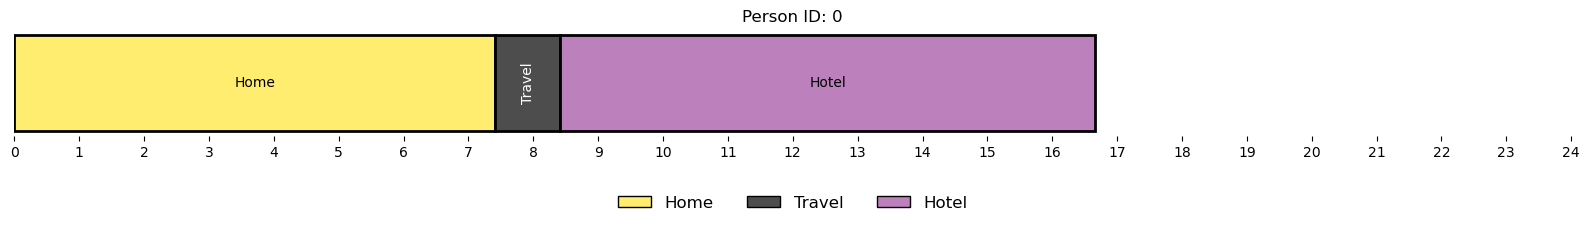

In [7]:
person.plot()

### Locations

Pam uses `pam.location.Location` objects to keep track of `Activity` and `Trip` locations.

These locations can be any combination of `area` or `loc` or `link`. Area is assumed to be spatial zone id, for example, "City of London".

`Loc` must be a coordinate (using a `shapely.geometry.Point`). `Link` is a network id. Locs and Links are only required for specific applications such as MATSim and can be added or sampled later, so are not covered further here.

In [8]:
from shapely.geometry import Point

In [9]:
person = Person(pid=0, attributes={"type": "example"})

person.add(
    Activity(act="home", area="A", loc=Point((0, 0)), start_time=mtdt(0), end_time=mtdt(445))
)
person.add(
    Trip(
        mode="car",
        start_area="A",
        end_area="B",
        start_loc=Point((0, 0)),
        end_loc=Point((1234, 1234)),
        start_time=mtdt(445),
        end_time=mtdt(505),
    )
)
person.add(Activity(act="hotel", area="B", start_time=mtdt(505), end_time=mtdt(1000)))

person.validate()  # the validate method check for consistency in the sequence of locations and times
person.print()

Person: 0
{'type': 'example'}
0:	Activity(act:home, location:POINT (0 0), time:00:00:00 --> 07:25:00, duration:7:25:00)
1:	Leg(mode:car, area:POINT (0 0) --> POINT (1234 1234), time:07:25:00 --> 08:25:00, duration:1:00:00)
2:	Activity(act:hotel, location:B, time:08:25:00 --> 16:40:00, duration:8:15:00)


### All Togther Now

PAM has read methods for common travel diary data formats and for MATSim. Pam also has modules for modelling new activity sequences. But below we show how you might create a simple demonstration population from scratch.

Note that for conveneince the `add` methods will also try to unpack lists.

In [10]:
population = Population()  # create a new empty population

In [11]:
the_smiths = Household("Smiths")

tom = Person("Tom", attributes={"age": "low"})
tammy = Person("Tammy", attributes={"age": "low"})
the_smiths.add([tom, tammy])

population.add(the_smiths)  # and add the household to the population

tammy.add(
    [
        Activity(act="home", area="A", loc=Point((0, 0)), start_time=mtdt(0), end_time=mtdt(445)),
        Trip(
            mode="car",
            start_area="A",
            end_area="B",
            start_loc=Point((0, 0)),
            end_loc=Point((1234, 1234)),
            start_time=mtdt(445),
            end_time=mtdt(505),
        ),
        Activity(
            act="work", area="B", loc=Point((1233, 1234)), start_time=mtdt(505), end_time=mtdt(990)
        ),
        Trip(
            mode="car",
            start_area="B",
            end_area="A",
            start_loc=Point((1234, 1234)),
            end_loc=Point((0, 0)),
            start_time=mtdt(990),
            end_time=mtdt(1050),
        ),
        Activity(
            act="home",
            area="A",
            loc=Point((0, 0)),
            start_time=mtdt(1050),
            end_time=mtdt(24 * 60),  # assuming a 24 hour day
        ),
    ]
)

tom.add(
    [
        Activity(
            act="home",
            area="A",
            loc=Point((0, 0)),
            start_time=mtdt(0),
            end_time=mtdt(24 * 60),  # assuming a 24 hour day
        )
    ]
)

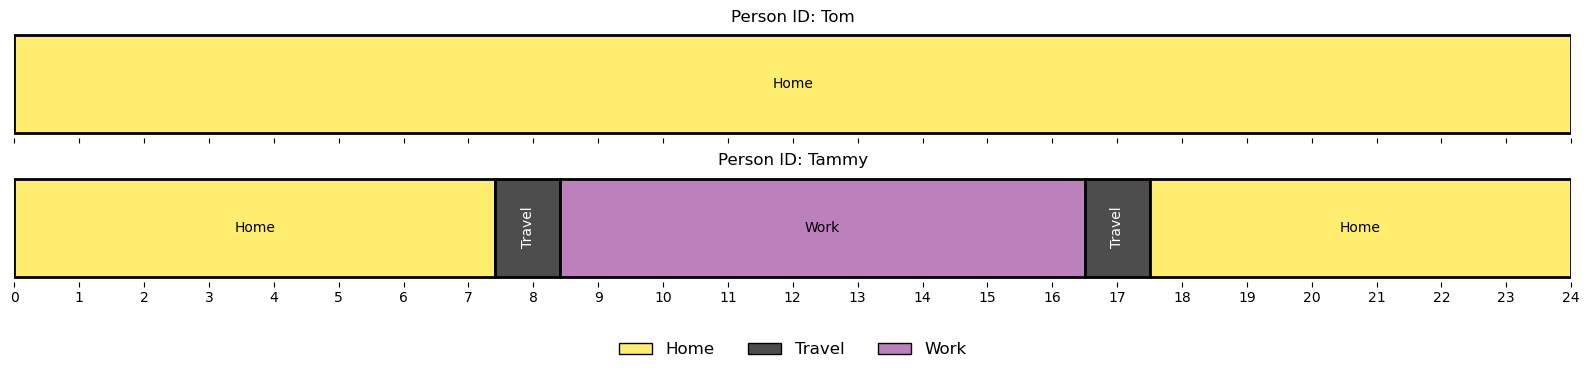

In [12]:
the_smiths.plot()

In [13]:
milkman = Person("milk_bot", attributes={"bot": "yes", "electric vehicle": "yes"})

population.add(
    milkman
)  # adding a person directly to the population is possible but a household with the same id will be auto generated

milkman.add(
    [
        Activity(act="depot", area="A", loc=Point((0, 0)), start_time=mtdt(0), end_time=mtdt(300)),
        Trip(
            mode="car",
            start_area="A",
            end_area="A",
            start_loc=Point((0, 0)),
            end_loc=Point((1000, 1000)),
            start_time=mtdt(300),
            end_time=mtdt(310),
        ),
        Activity(
            act="delivery",
            area="A",
            loc=Point((1000, 1000)),
            start_time=mtdt(310),
            end_time=mtdt(320),
        ),
        Trip(
            mode="car",
            start_area="A",
            end_area="A",
            start_loc=Point((1000, 1000)),
            end_loc=Point((0, 1000)),
            start_time=mtdt(320),
            end_time=mtdt(330),
        ),
        Activity(
            act="delivery", area="A", loc=Point((0, 1000)), start_time=mtdt(330), end_time=mtdt(340)
        ),
        Trip(
            mode="car",
            start_area="A",
            start_loc=Point((0, 1000)),
            end_loc=Point((0, 0)),
            end_area="A",
            start_time=mtdt(340),
            end_time=mtdt(350),
        ),
        Activity(
            act="depot",
            area="A",
            loc=Point((0, 0)),
            start_time=mtdt(350),
            end_time=mtdt(24 * 60),  # assuming a 24 hour day
        ),
    ]
)

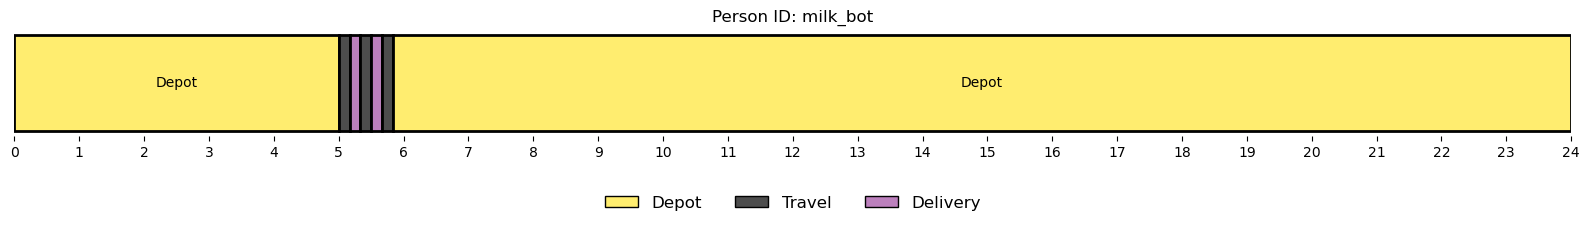

In [14]:
milkman.plot()

### Accessing Data

Households and Persons can be accessed and modified in a variety of ways:

In [15]:
# iterate through households and persons
for hid, household in population:
    household.attributes["checked"] = True
    for pid, person in household:
        person.attributes["checked"] = True

# iterate through persons only
for hid, pid, person in population.people():
    person.attributes["checked_again"] = True

# access household directly
population["Smiths"].attributes["smiths_check"] = True

# access person directly
population["Smiths"]["Tammy"].attributes["tammy_check"] = True

# access a random household
population.random_household().attributes["random_check"] = True

# access a random person
population.random_person().attributes["random_check"] = True

Person plans can be similarly accessed and modified in a variety of ways:

Activity(act:home, location:POINT (0 0), time:00:00:00 --> 07:25:00, duration:7:25:00)
Leg(mode:car, area:POINT (0 0) --> POINT (1234 1234), time:07:25:00 --> 08:25:00, duration:1:00:00)
Activity(act:work, location:POINT (1233 1234), time:08:25:00 --> 16:30:00, duration:8:05:00)
Leg(mode:car, area:POINT (1234 1234) --> POINT (0 0), time:16:30:00 --> 17:30:00, duration:1:00:00)
Activity(act:home, location:POINT (0 0), time:17:30:00 --> 00:00:00, duration:6:30:00)


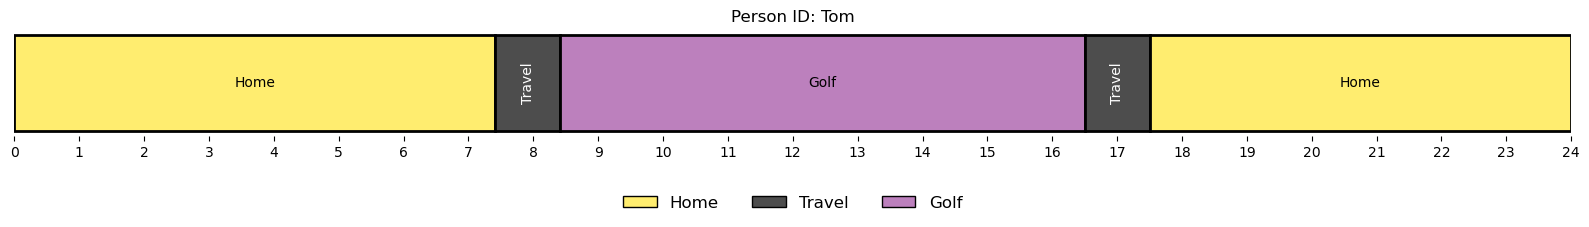

In [16]:
from copy import deepcopy

person = population["Smiths"]["Tom"]

# modify a persons plan
person.plan = deepcopy(population["Smiths"]["Tammy"].plan)

# access plan components via index
assert person.plan[0].act == "home"

# iterate plan components
for component in person.plan:
    print(component)

# iterate plan activities
for activity in person.activities:
    if activity.act == "work":
        activity.act = "golf"

# iterate plan legs
for leg in person.legs:
    leg.mode = "walk"

person.plot()

### Export

Exports plans to csv or xml format for MATSim.

In [17]:
from pam.write import write_matsim
from pam.write.diary import to_csv

In [18]:
to_csv(population=population, dir="tmp")
write_matsim(population=population, plans_path="tmp/plans.xml")

Missing person weight in hh Smiths, returning None.
Missing person weight in hh milk_bot, returning None.
